# Quick demo of segmentation

In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import numpy as np
import pandas as pd
import stumpy as sp
import os
import sys
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, './../')

from tsmule.sampling.segment import MatrixProfileSegmentation, SAXSegmentation, WindowSegmentation
from tsmule.xai.viz import visualize_segmentation_mask


In [9]:

url = 'https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1'
df = pd.read_csv(url)

n = 512
ts = df['steam flow'][:n]
ts2 = df['drum pressure'][:n]
mts = np.stack([ts, ts2], axis=1)

## Segmentation with bins of matrix profile distance

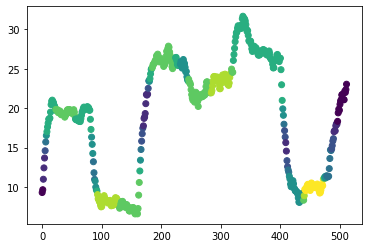

In [10]:
mseg = MatrixProfileSegmentation(partitions=10, win_length=32)
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method='bins-max')
plt.scatter(range(n), ts, c=seg_m)

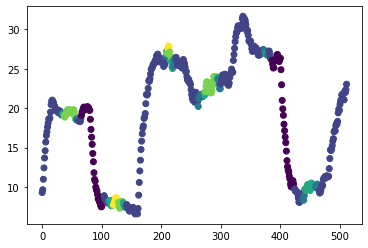

In [11]:
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method='bins-min')
plt.scatter(range(n), ts, c=seg_m)

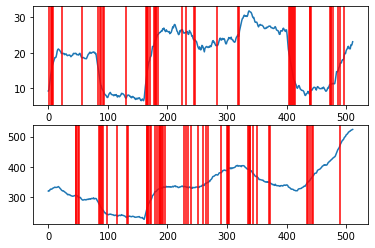

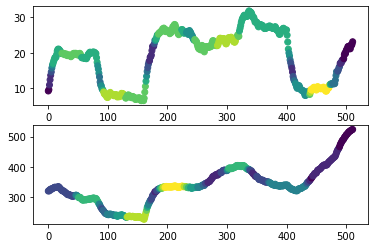

In [12]:
seg_m = mseg.segment(mts, segmentation_method='bins-max')

visualize_segmentation_mask(mts, seg_m)

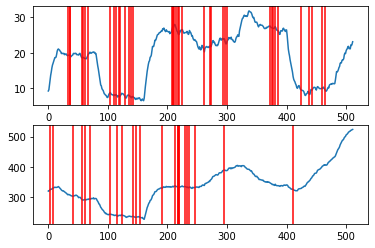

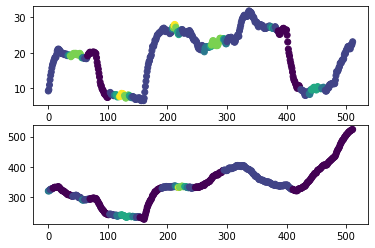

In [13]:
seg_m = mseg.segment(mts, segmentation_method='bins-min')

visualize_segmentation_mask(mts, seg_m)

## Segmentation with slopes of matrix profile distance

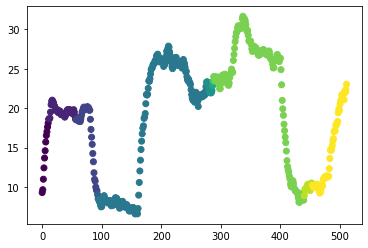

In [14]:
seg_m = mseg.segment(ts.values.reshape(-1, 1), segmentation_method='slopes-min')
plt.scatter(range(n), ts, c=seg_m)

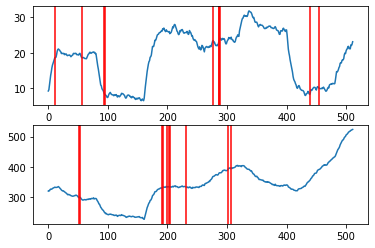

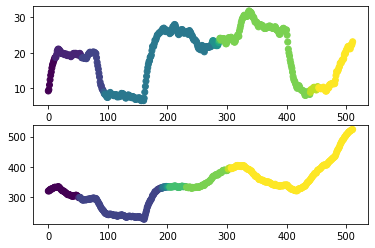

In [15]:
seg_m = mseg.segment(mts, segmentation_method='slopes-min')

visualize_segmentation_mask(mts, seg_m)

## Segmentation with SAX

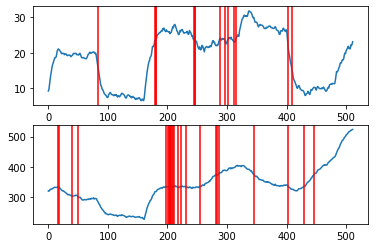

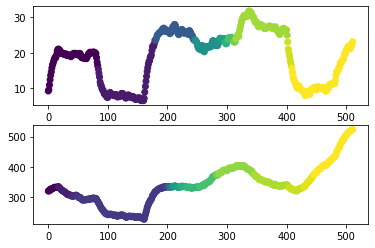

In [16]:
sseg = SAXSegmentation(partitions=10)
seg_m = sseg.segment(mts)

visualize_segmentation_mask(mts, seg_m)

# Segmentation with uniform and exponential windows

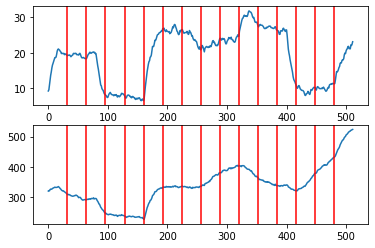

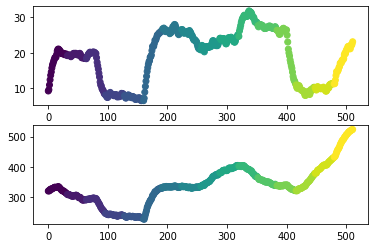

In [26]:
sseg = WindowSegmentation(partitions=10, win_length=32)
seg_m = sseg.segment(mts)

visualize_segmentation_mask(mts, seg_m)

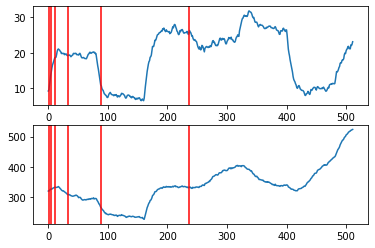

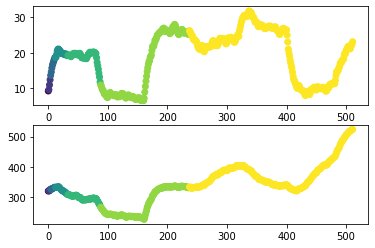

In [27]:
seg_m = sseg.segment(mts, 'exponential')

visualize_segmentation_mask(mts, seg_m)